In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_recall_curve,precision_score,roc_auc_score,roc_curve,accuracy_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/heart_failure_clinical_records_dataset.csv')

In [3]:
df

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

In [5]:
import seaborn as sns

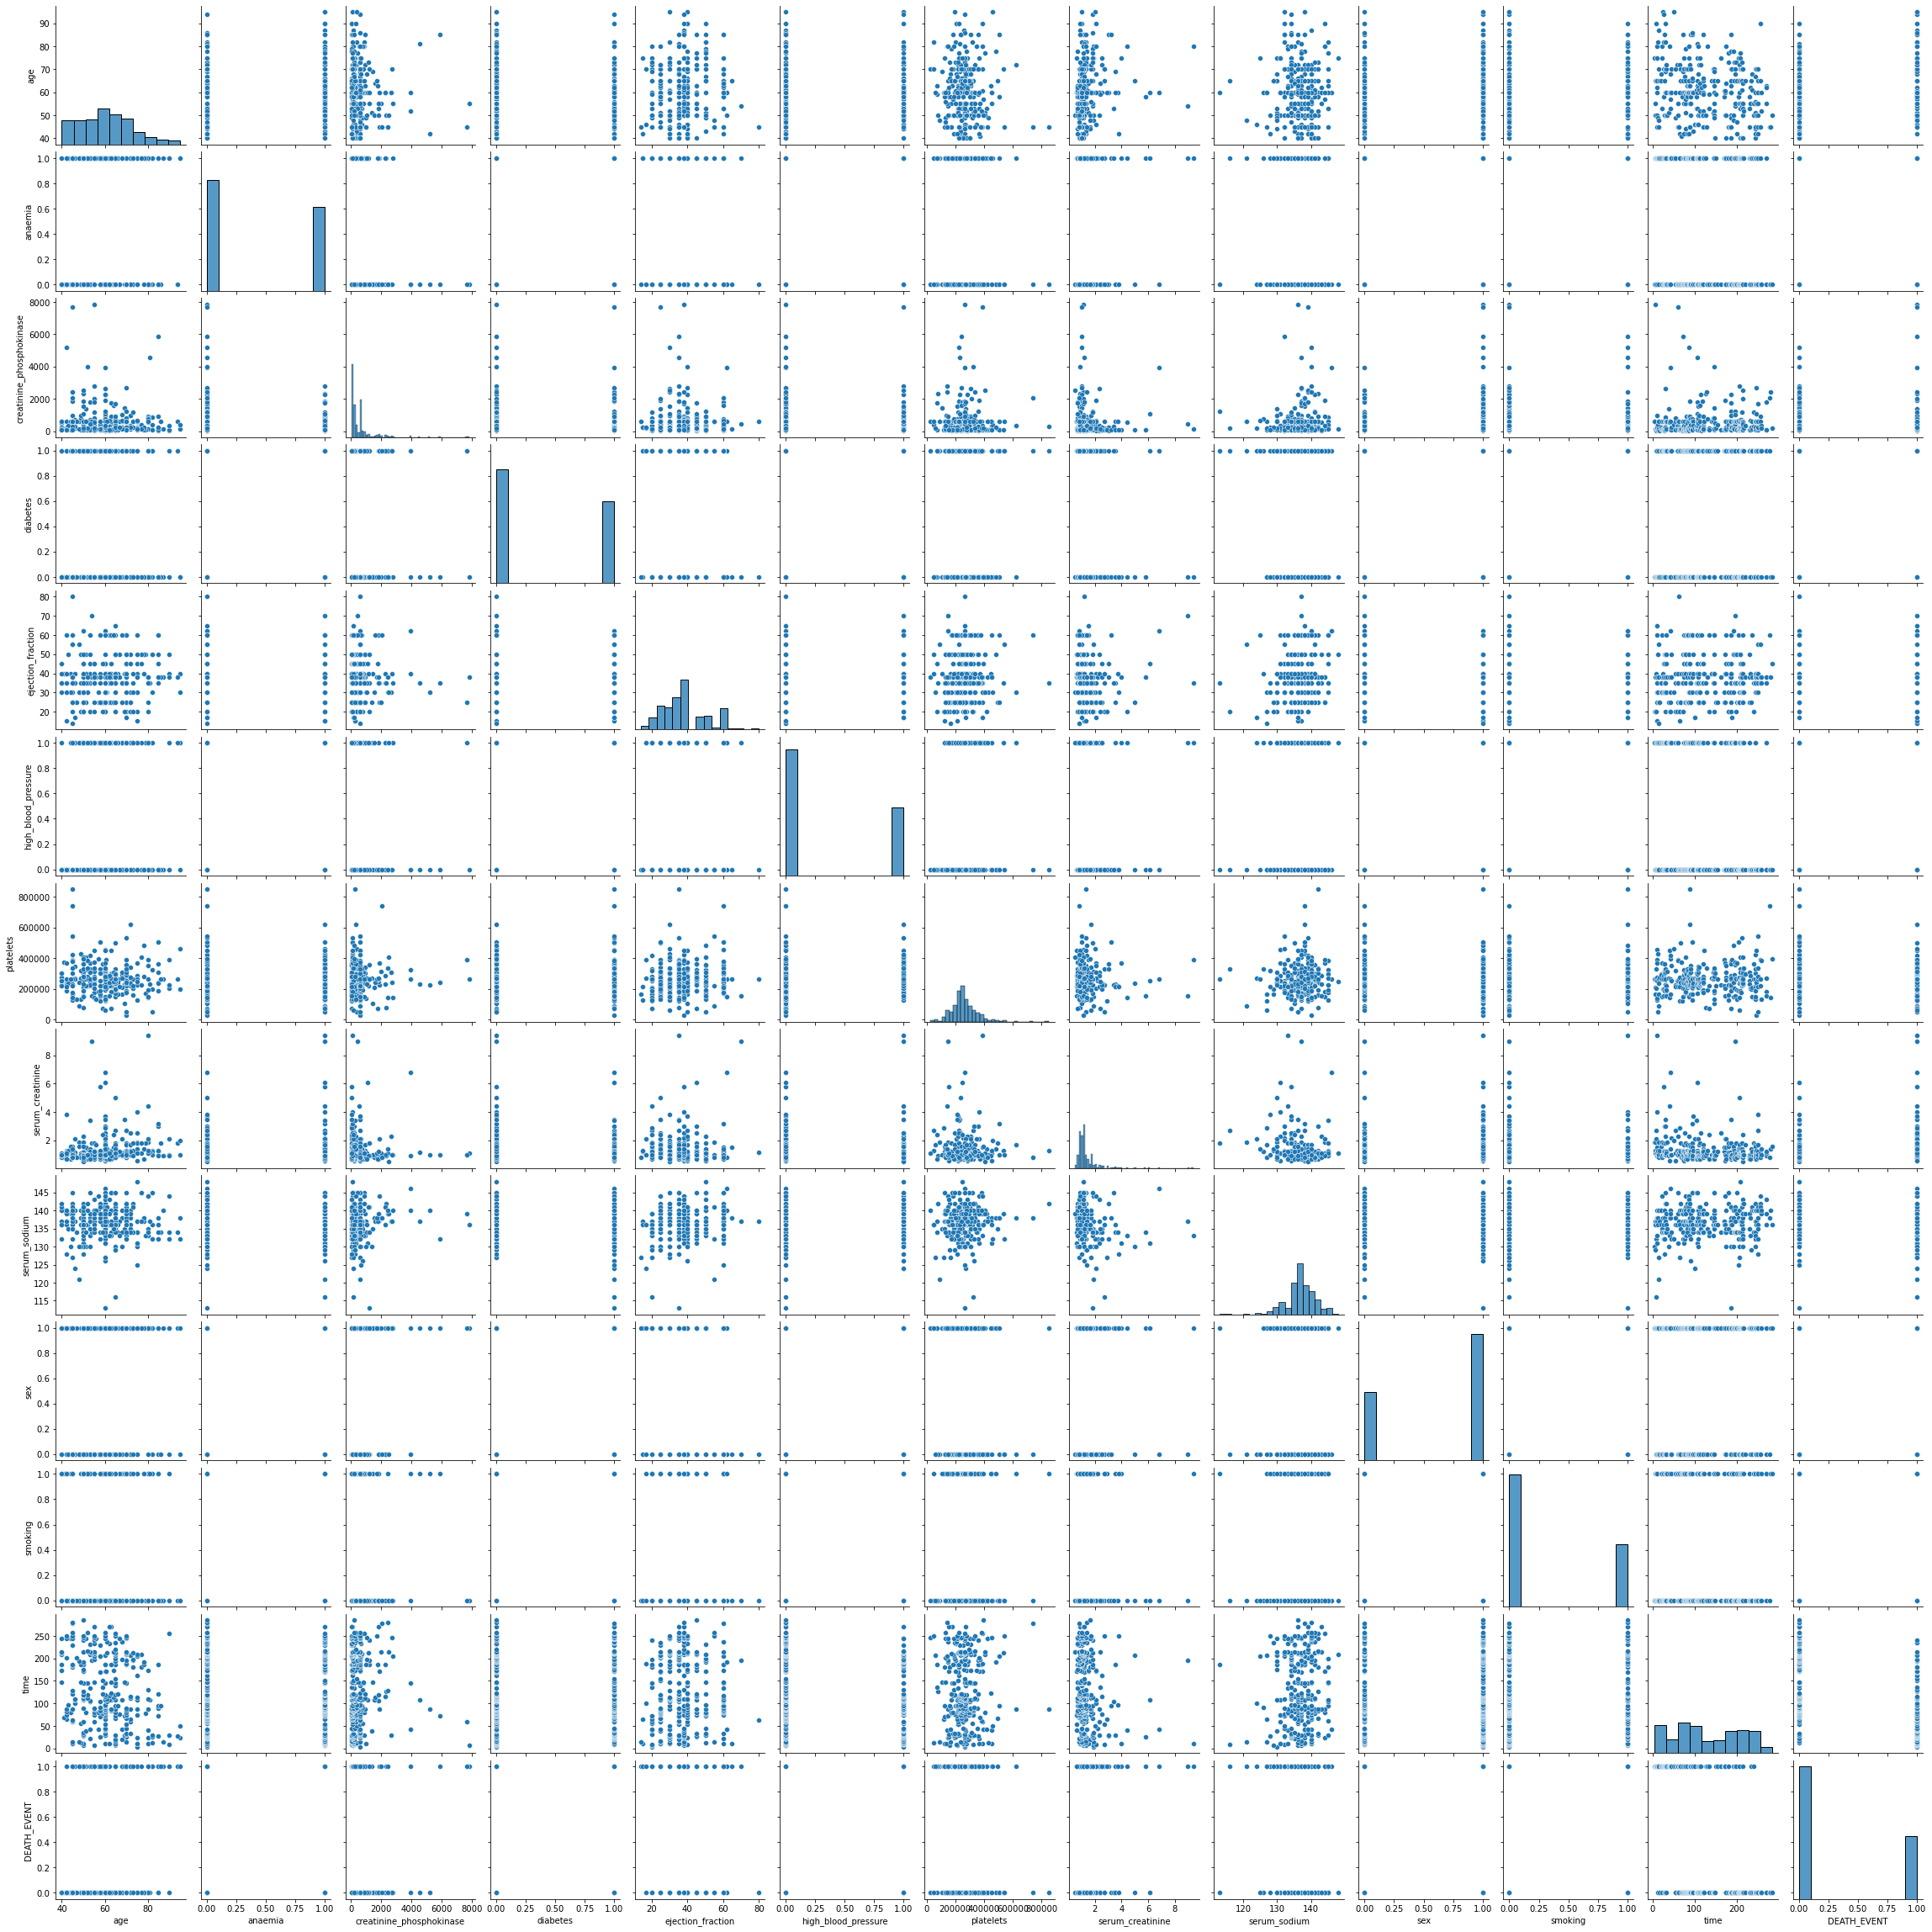

In [7]:
sns.pairplot(df)

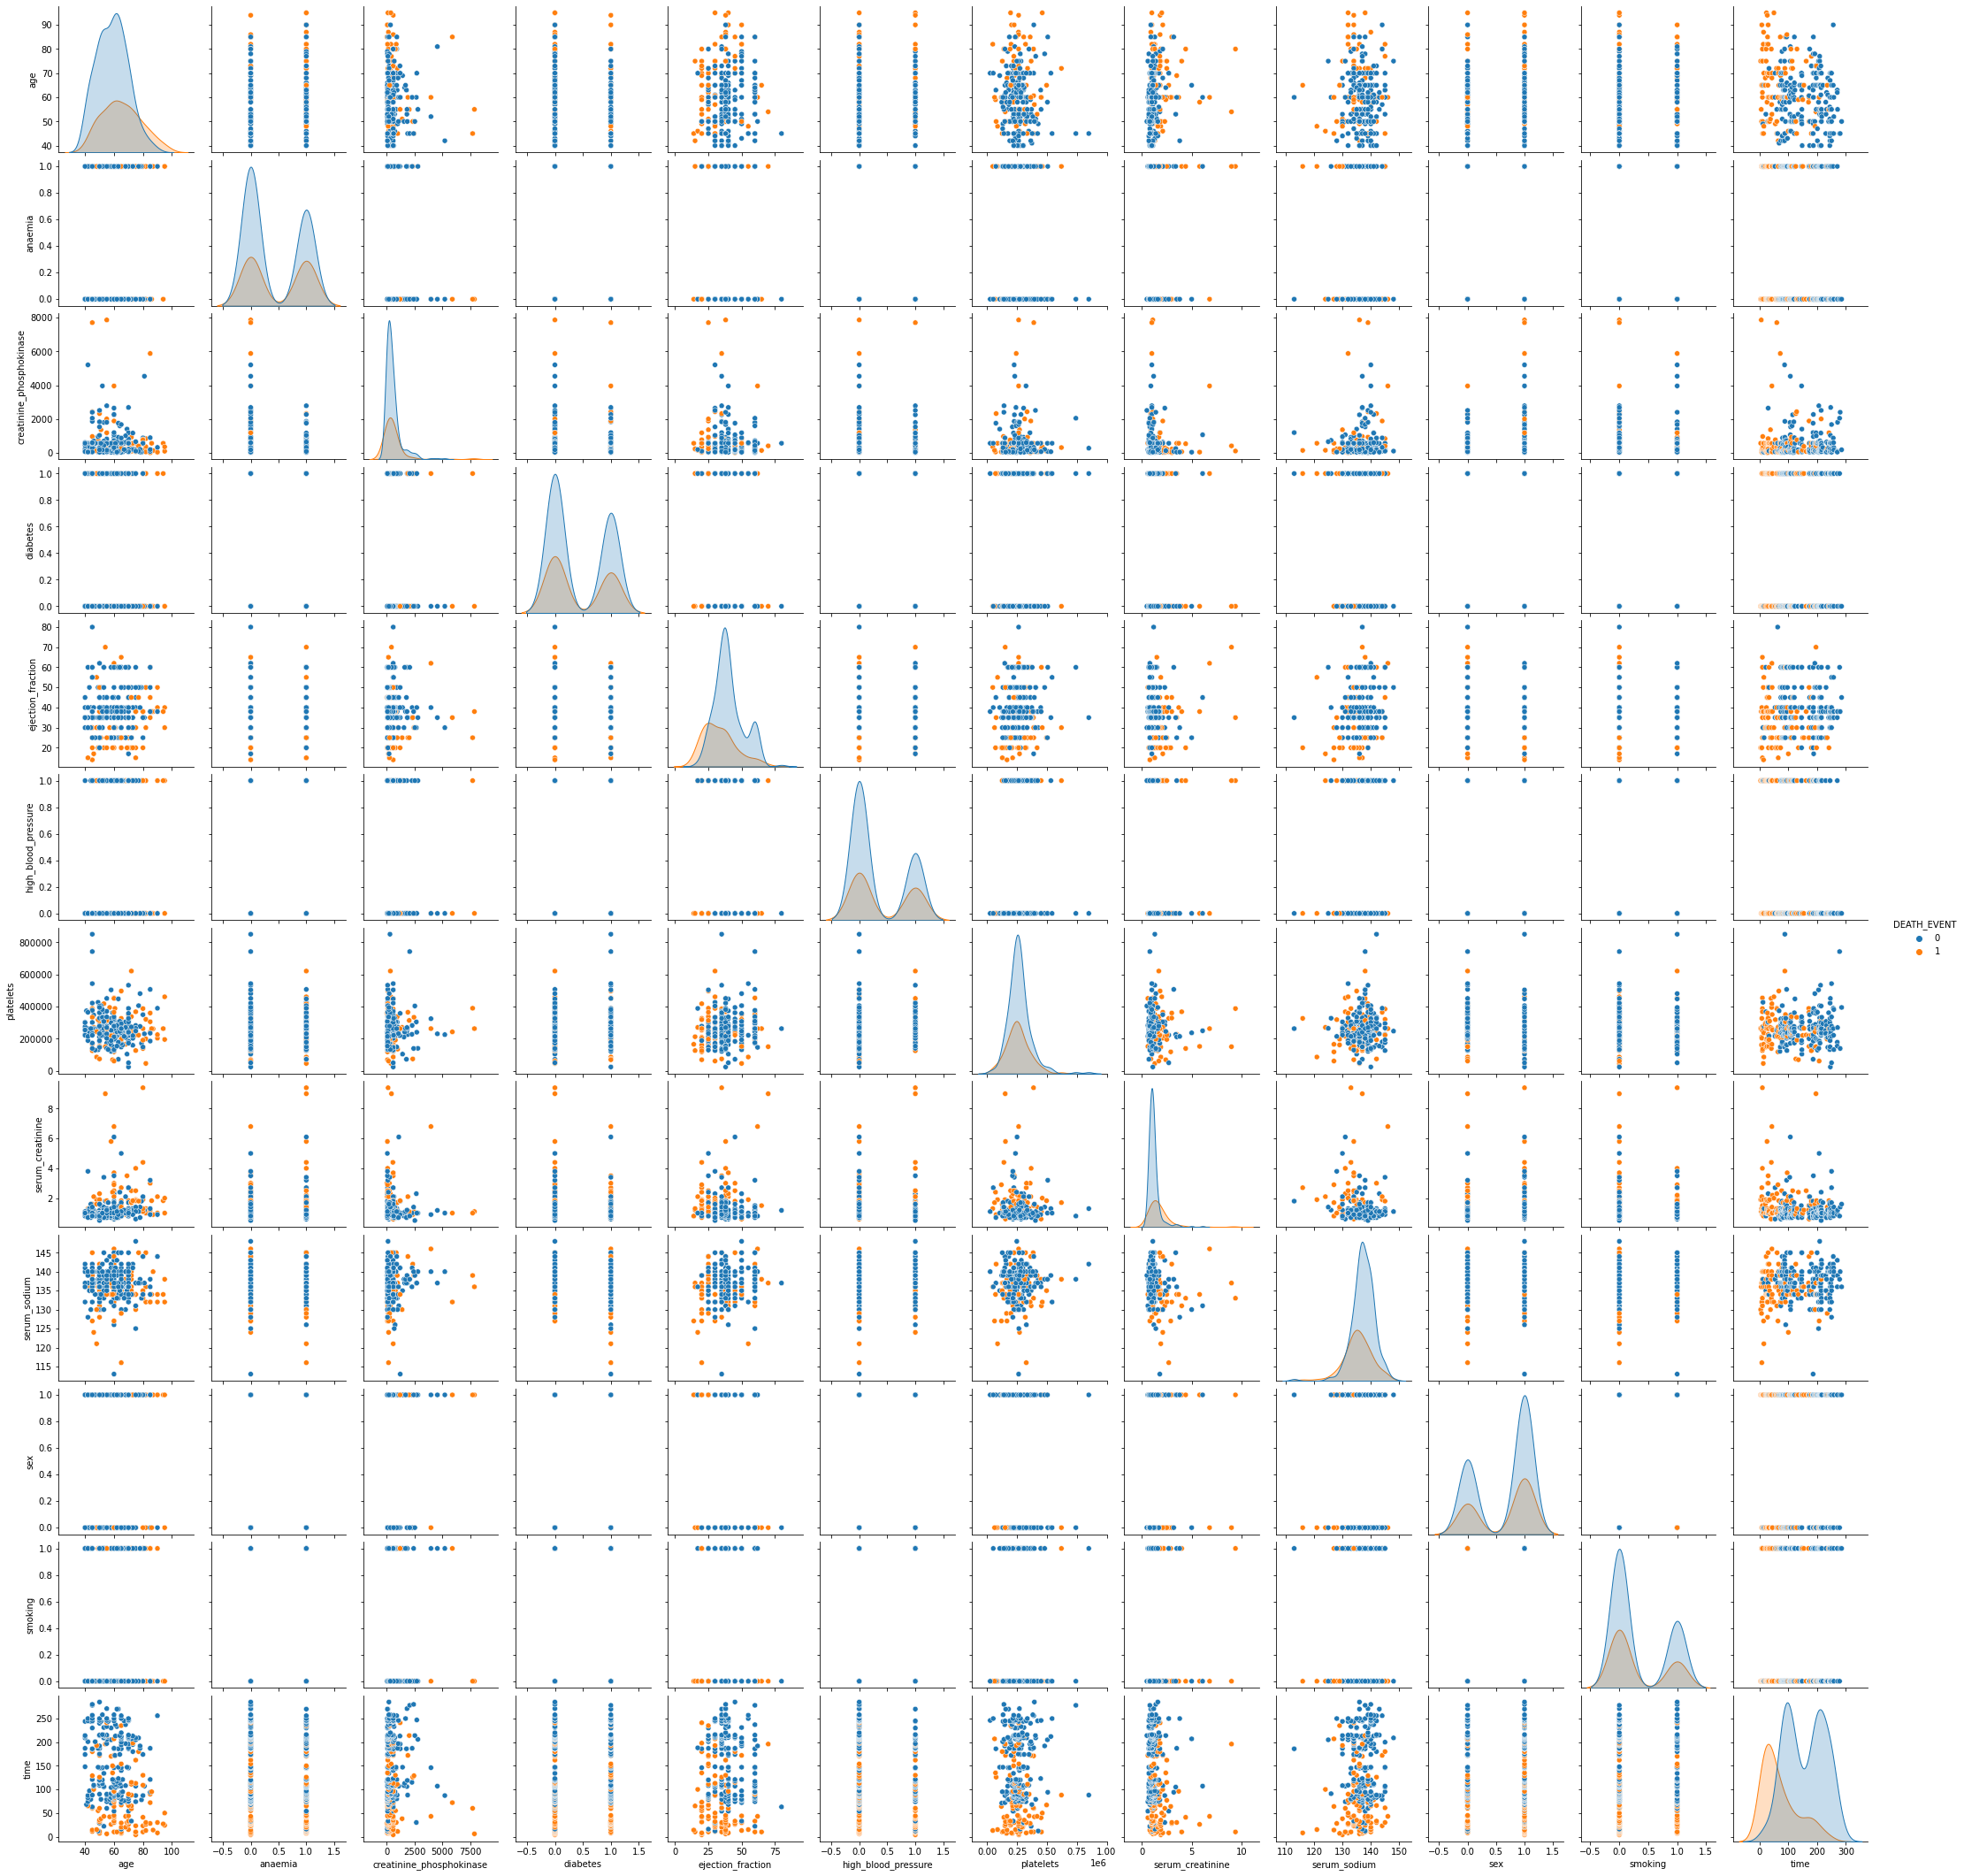

In [6]:
sns.pairplot(df, hue = "DEATH_EVENT")

way less orange color too many blue color


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

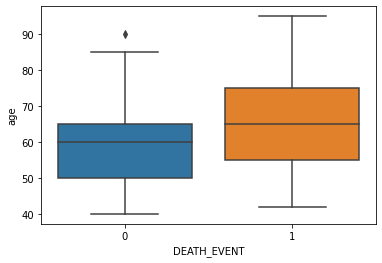

In [9]:
# investigate
sns.boxplot(x = "DEATH_EVENT", y = "age", data=df)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='creatinine_phosphokinase'>

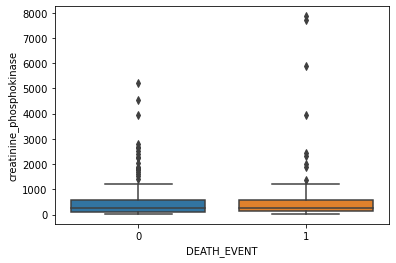

In [10]:
sns.boxplot(x = "DEATH_EVENT", y = "creatinine_phosphokinase", data=df)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='diabetes'>

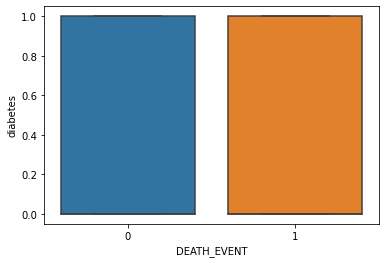

In [11]:
sns.boxplot(x = "DEATH_EVENT", y = "diabetes", data=df)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

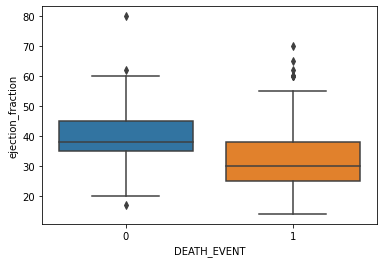

In [12]:
# amount of blood heart pumps out each beat
sns.boxplot(x = "DEATH_EVENT", y = "ejection_fraction", data=df)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

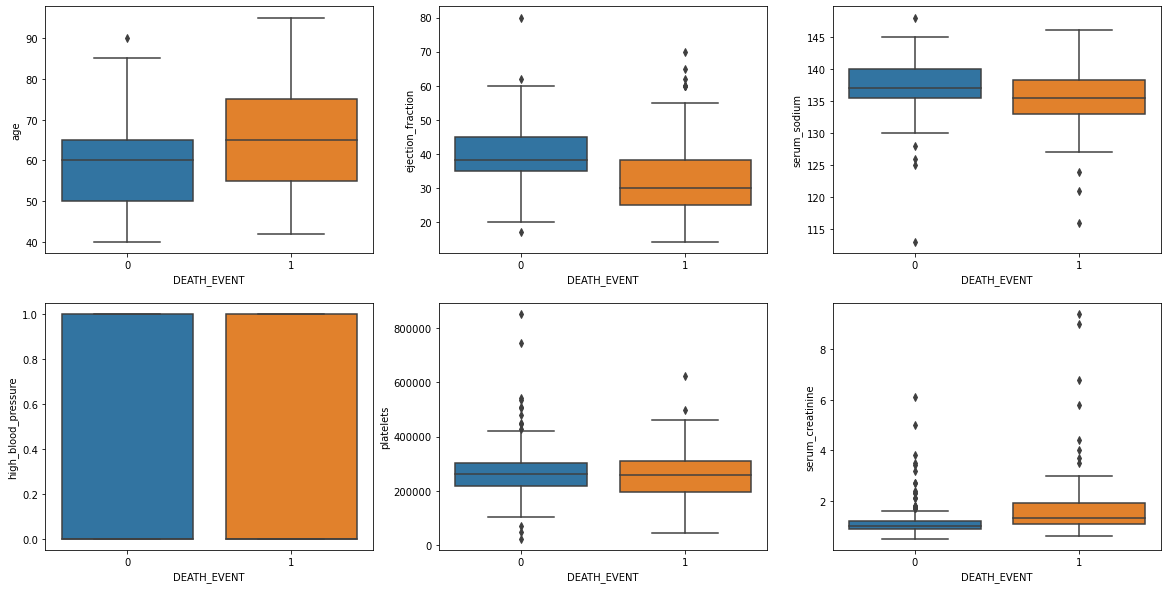

In [19]:
import matplotlib.pyplot as plt

fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize = (20,10))
sns.boxplot(x='DEATH_EVENT', y='age', ax=ax1, data=df)
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', ax=ax2, data=df)
sns.boxplot(x='DEATH_EVENT', y='serum_sodium', ax=ax3, data=df)
sns.boxplot(x='DEATH_EVENT', y='high_blood_pressure', ax=ax4, data=df)
sns.boxplot(x='DEATH_EVENT', y='platelets', ax=ax5, data=df)
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', ax=ax6, data=df)


In [20]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [21]:
df.groupby(['DEATH_EVENT','anaemia'])[['diabetes','high_blood_pressure','sex', 'smoking']].count()

diabetes  high_blood_pressure  sex  smoking
DEATH_EVENT anaemia                                             
0           0             120                  120  120      120
            1              83                   83   83       83
1           0              50                   50   50       50
            1              46                   46   46       46